In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline









In [ ]:
df = pd.read_excel("HousePrediction.xlsx")


In [ ]:
df.head(100)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [ ]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
df.isnull().sum()


,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
numerical_features = df.select_dtypes(exclude=['object']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')
Categorical Features: Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


In [ ]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print(feature)
        print(df.groupby(df[feature].isnull())['SalePrice'].mean())
        print("---------------------")


MSZoning
MSZoning
False    180921.19589
True              NaN
Name: SalePrice, dtype: float64
---------------------
Exterior1st
Exterior1st
False    180921.19589
True              NaN
Name: SalePrice, dtype: float64
---------------------
BsmtFinSF2
BsmtFinSF2
False    180921.19589
True              NaN
Name: SalePrice, dtype: float64
---------------------
TotalBsmtSF
TotalBsmtSF
False    180921.19589
True              NaN
Name: SalePrice, dtype: float64
---------------------
SalePrice
SalePrice
False    180921.19589
True              NaN
Name: SalePrice, dtype: float64
---------------------


In [ ]:
len(numerical_features)


9

In [ ]:
df[numerical_features].head()


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


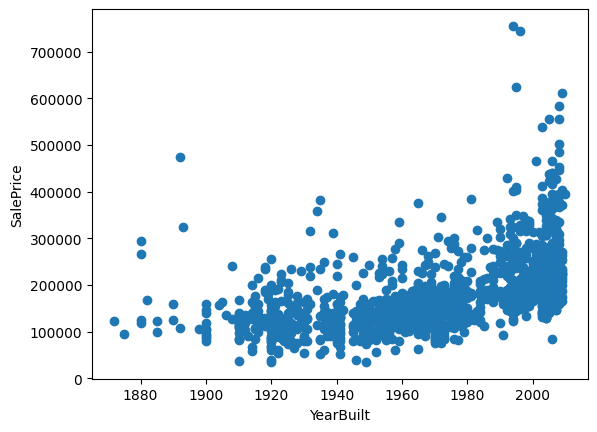

In [ ]:
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()


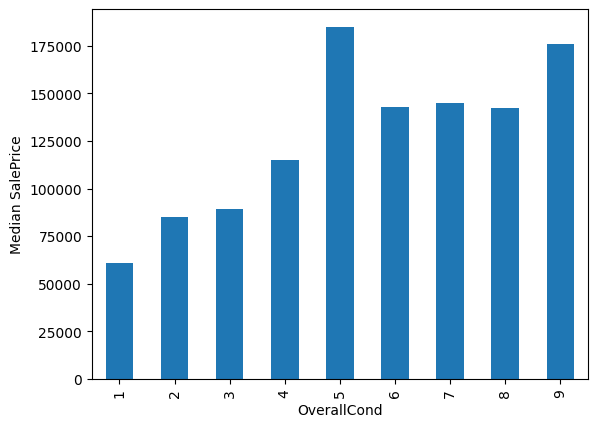

In [ ]:
df.groupby('OverallCond')['SalePrice'].median().plot.bar()
plt.xlabel("OverallCond")
plt.ylabel("Median SalePrice")
plt.show()


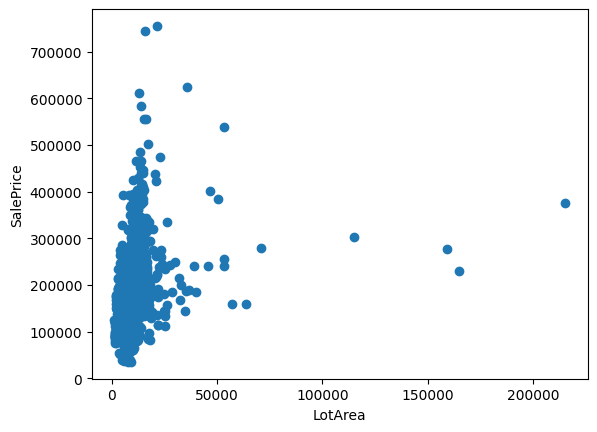

In [ ]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()


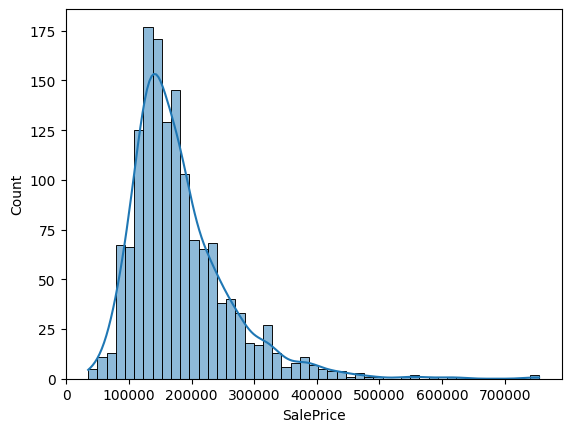

In [ ]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()


In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])


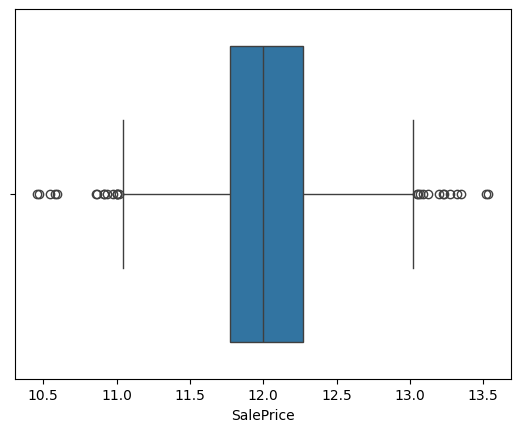

In [ ]:
sns.boxplot(x=df['SalePrice'])
plt.show()


In [ ]:
for col in numerical_features:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2071882794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2071882794.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
df.corr()['SalePrice'].sort_values(ascending=False)


,SalePrice
SalePrice,1.000000
TotalBsmtSF,0.431064
YearBuilt,0.413167
YearRemodAdd,0.396014
Exterior1st_VinylSd,0.237834
LotArea,0.231849
MSZoning_RL,0.208410
LotConfig_CulDSac,0.108750
MSZoning_FV,0.081761
Exterior1st_CemntBd,0.065533


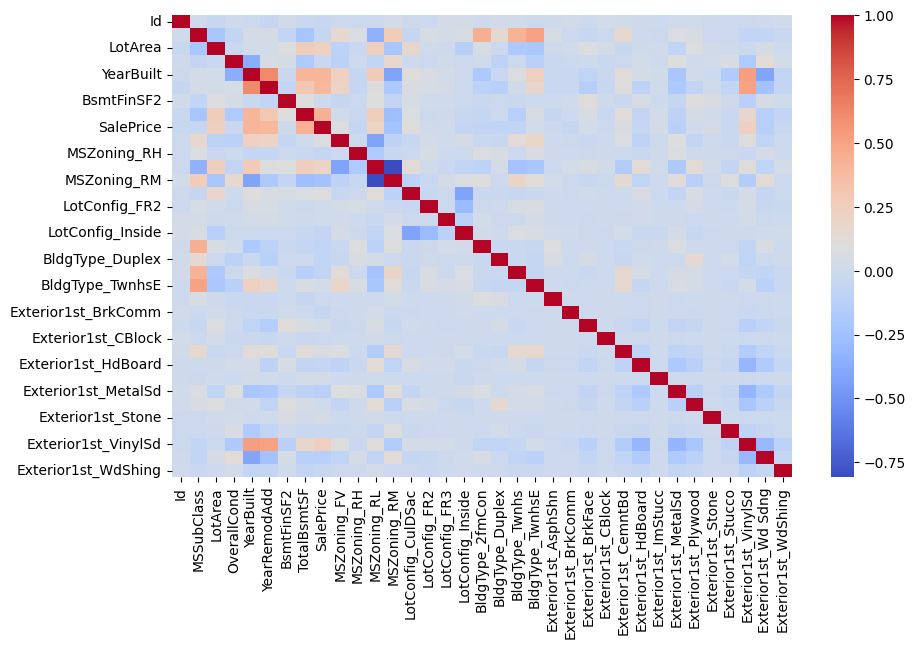

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()
